In [8]:
from utils import (
    get_areas, 
    get_specimen_ids, 
    get_trials,
    get_units_count,
    get_summary_df,
    load_memmap,
    load_index
)

from neural_maps import (
    sim_corrected_source_pair, 
    pls_corrected_single_source_to_B,
    sim_corrected_model_to_B,
    pls_corrected_model_to_B
)

from mapping import (
    compute_all_layer_scores,
    compute_area_scores
)

from alex_extractor import build_alexnet_design_matrices_with_dataloader

from plotter import plot_cka_comparison

import itertools
import pandas as pd
import json
import os


# Passing the stimuli to AlexNet and extracting activations

In [2]:
index_model_random = build_alexnet_design_matrices_with_dataloader(
    folder="../PreprocData/stimuli_images/",
    batch_size=16,
    shuffle=False,
    num_workers=4,
    weights="random",
    device="cpu",
    amp=True,
    layers_keep=["conv1", "conv2", "conv3", "conv4", "conv5"],
    save_dir="alex-random-matrices",
    return_in_memory=False
)

/home/giovanni/Desktop/rep-analysis/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/giovanni/Desktop/rep-analysis/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:
index_model_inet = build_alexnet_design_matrices_with_dataloader(
    folder="../PreprocData/stimuli_images/",
    batch_size=16,
    shuffle=False,
    num_workers=4,
    weights="imagenet",
    device="cpu",
    amp=True,
    layers_keep=["conv1", "conv2", "conv3", "conv4", "conv5"],
    save_dir="alex-matrices-inet",
    return_in_memory=False
)

# Loading the index file with paths to neural data

In [9]:
index_df = pd.read_csv('../PreprocData/PreprocData/index.csv')

In [10]:
layer_scores_random_cka, median_scores_random_cka = compute_area_scores(index_model_random, index_df, sim_metric='CKA')
layer_scores_inet_cka, median_scores_inet_cka = compute_area_scores(index_model_inet, index_df, sim_metric='CKA')

Layer: conv1, Area: AL, Specimen: 717038288, Score: 0.0980
Layer: conv1, Area: AL, Specimen: 738651054, Score: 0.1336
Layer: conv1, Area: AL, Specimen: 742714475, Score: 0.1406
Layer: conv1, Area: AL, Specimen: 745276236, Score: 0.0779
Layer: conv1, Area: AL, Specimen: 757329624, Score: 0.1388
Layer: conv1, Area: AL, Specimen: 775876828, Score: 0.1101
Layer: conv1, Area: AM, Specimen: 730756780, Score: 0.0797
Layer: conv1, Area: AM, Specimen: 730760270, Score: 0.0601
Layer: conv1, Area: AM, Specimen: 732548380, Score: 0.0796
Layer: conv1, Area: AM, Specimen: 734865738, Score: 0.1163
Layer: conv1, Area: AM, Specimen: 738651054, Score: 0.1117
Layer: conv1, Area: AM, Specimen: 742602892, Score: 0.0895
Layer: conv1, Area: AM, Specimen: 775876828, Score: 0.1032
Layer: conv1, Area: LM, Specimen: 723627604, Score: 0.0441
Layer: conv1, Area: LM, Specimen: 733457989, Score: 0.0610
Layer: conv1, Area: LM, Specimen: 745276236, Score: 0.1454
Layer: conv1, Area: LM, Specimen: 769360779, Score: 0.10

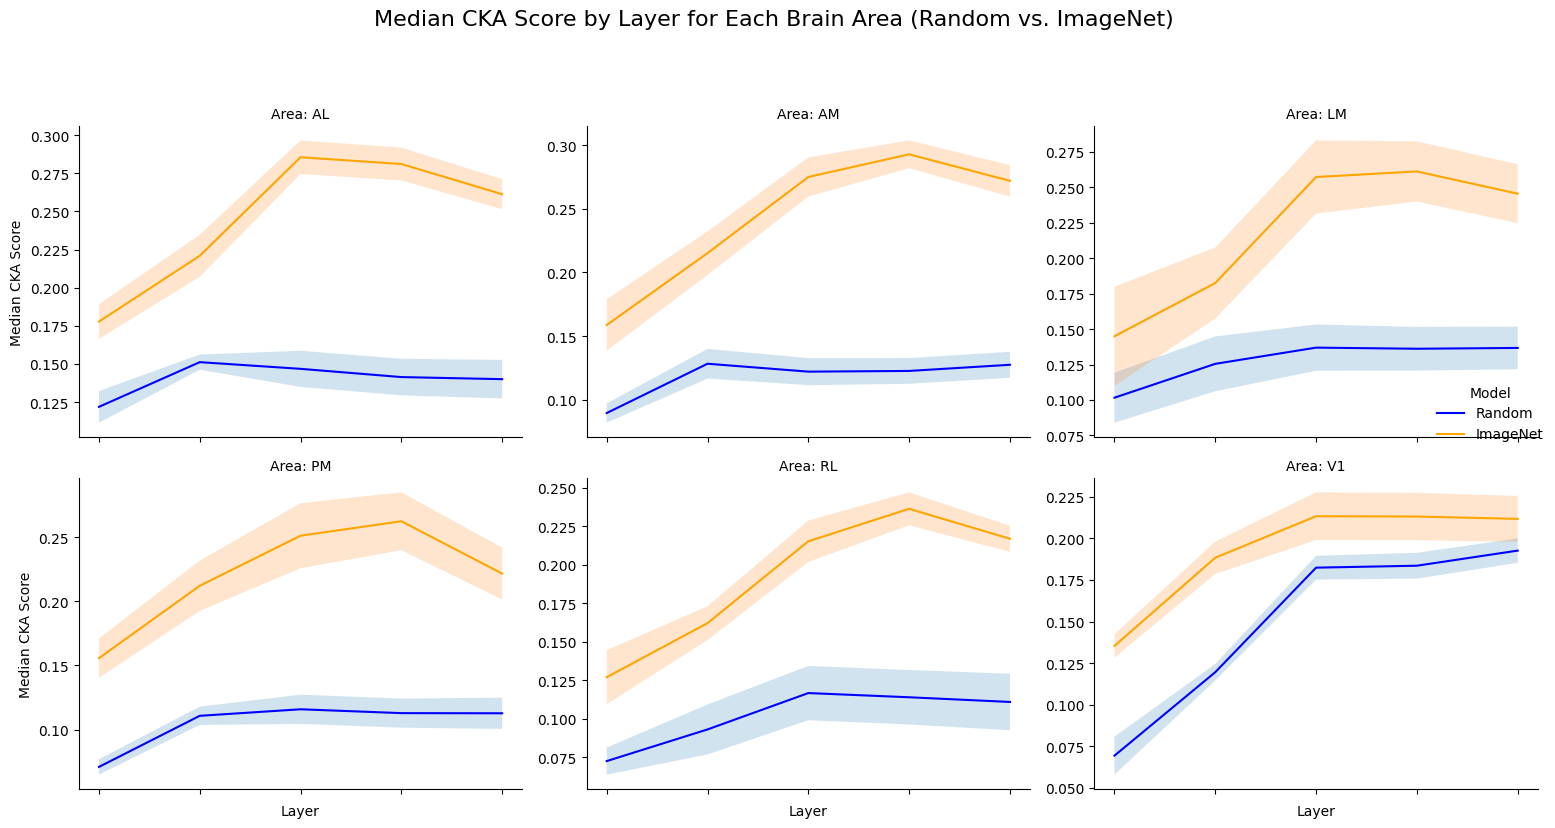

In [11]:
plot_cka_comparison(median_scores_random_cka, median_scores_inet_cka, metric_name='CKA')

Layer: conv1, Area: AL, Specimen: 717038288, Score: 0.1815
Layer: conv1, Area: AL, Specimen: 738651054, Score: 0.2022
Layer: conv1, Area: AL, Specimen: 742714475, Score: 0.2380
Layer: conv1, Area: AL, Specimen: 745276236, Score: 0.1692
Layer: conv1, Area: AL, Specimen: 757329624, Score: 0.2339
Layer: conv1, Area: AL, Specimen: 775876828, Score: 0.1934
Layer: conv1, Area: AM, Specimen: 730756780, Score: 0.1729
Layer: conv1, Area: AM, Specimen: 730760270, Score: 0.1618
Layer: conv1, Area: AM, Specimen: 732548380, Score: 0.1826
Layer: conv1, Area: AM, Specimen: 734865738, Score: 0.2182
Layer: conv1, Area: AM, Specimen: 738651054, Score: 0.1673
Layer: conv1, Area: AM, Specimen: 742602892, Score: 0.1495
Layer: conv1, Area: AM, Specimen: 775876828, Score: 0.1951
Layer: conv1, Area: LM, Specimen: 723627604, Score: 0.2118
Layer: conv1, Area: LM, Specimen: 733457989, Score: 0.1627
Layer: conv1, Area: LM, Specimen: 745276236, Score: 0.1990
Layer: conv1, Area: LM, Specimen: 769360779, Score: 0.19

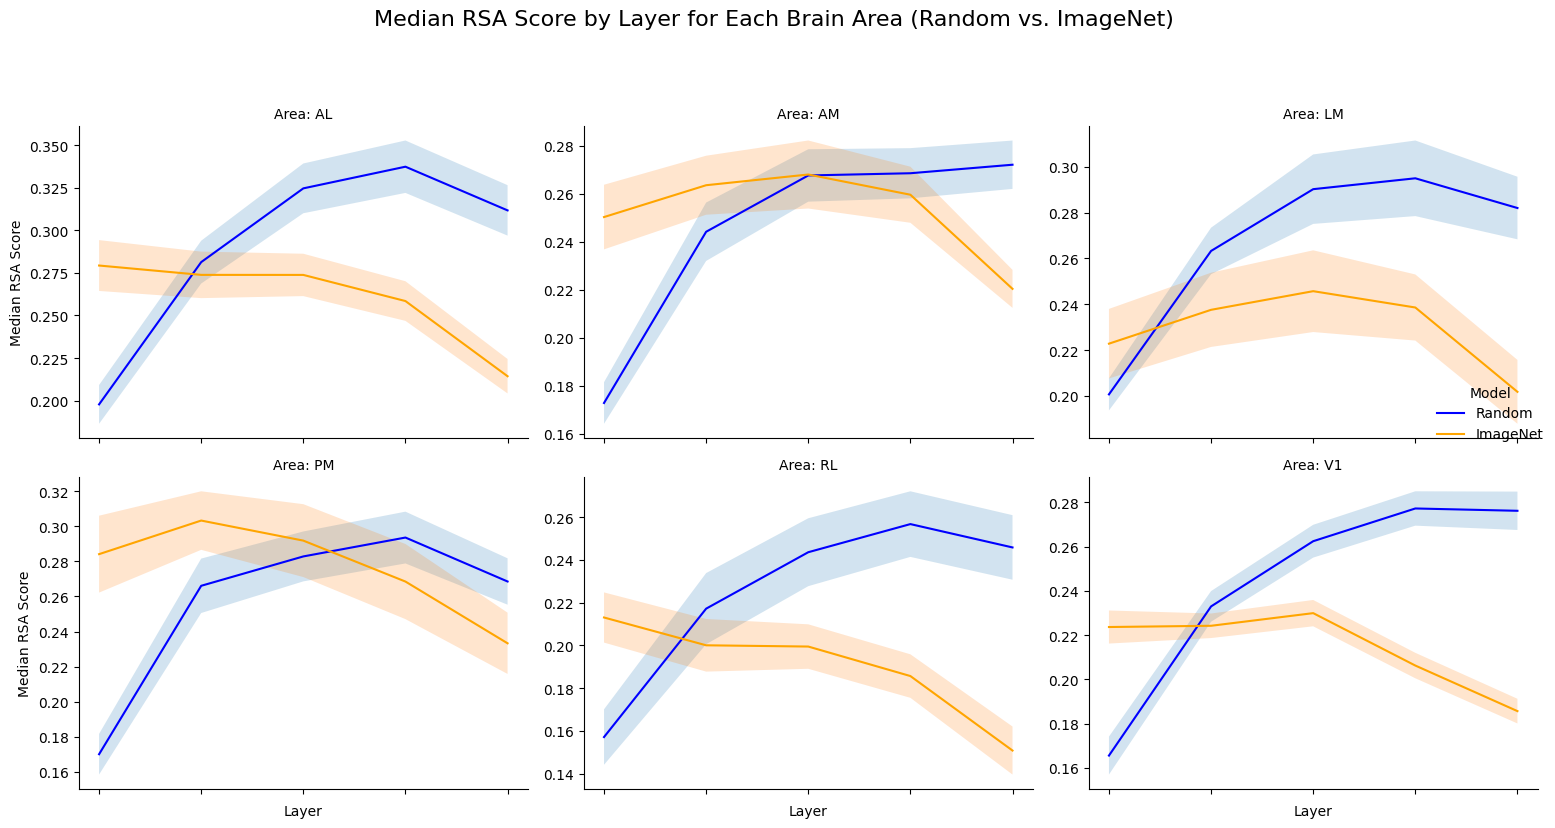

In [12]:
layer_scores_random_rsa, median_scores_random_rsa = compute_area_scores(index_model_random, index_df, sim_metric='RSA')
layer_scores_inet_rsa, median_scores_inet_rsa = compute_area_scores(index_model_inet, index_df, sim_metric='RSA')
plot_cka_comparison(median_scores_random_rsa, median_scores_inet_rsa, metric_name='RSA')

In [ ]:
layer_scores_random_pls, median_scores_random_pls = compute_area_scores(index_model_random, index_df, sim_metric='PLS')
layer_scores_inet_pls, median_scores_inet_pls = compute_area_scores(index_model_inet, index_df, sim_metric='PLS')
plot_cka_comparison(median_scores_random_pls, median_scores_inet_pls, metric_name='PLS')